In [61]:
## Loading the necessary libraries
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext

from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col



# Initialize spark session

In [2]:

from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.master("local").appName("HealthInsuranceEDA").getOrCreate()

# loading the data

In [34]:
df_insurance = spark.read.option('header','true').csv('insurance.csv')

In [35]:
df_insurance.show(5)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|    33|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
+---+------+------+--------+------+---------+-----------+
only showing top 5 rows



In [36]:
df_insurance.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- children: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: string (nullable = true)



# Exploratory Data Analysis

In [38]:
df_insurance.columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [39]:
df_insurance.select('age','sex').show(10)

+---+------+
|age|   sex|
+---+------+
| 19|female|
| 18|  male|
| 28|  male|
| 33|  male|
| 32|  male|
| 31|female|
| 46|female|
| 37|female|
| 37|  male|
| 60|female|
+---+------+
only showing top 10 rows



In [40]:
df_insurance.select('children').distinct().collect()

[Row(children='3'),
 Row(children='0'),
 Row(children='5'),
 Row(children='1'),
 Row(children='4'),
 Row(children='2')]

In [52]:
df_insurance.groupBy("region").count().sort("region", ascending=False).show(10)

+---------+-----+
|   region|count|
+---------+-----+
|southwest|  325|
|southeast|  364|
|northwest|  325|
|northeast|  324|
+---------+-----+



In [41]:
df_insurance.select('sex').distinct().collect()

[Row(sex='female'), Row(sex='male')]

# Data Cleaning 
#Check if there is any null value or missing value.

In [44]:
from pyspark.sql.functions import isnan, when, count, col

df_insurance.select([count(when(isnan(c), c)).alias(c) for c in df_insurance.columns]).show()

+---+---+---+--------+------+------+-------+
|age|sex|bmi|children|smoker|region|charges|
+---+---+---+--------+------+------+-------+
|  0|  0|  0|       0|     0|     0|      0|
+---+---+---+--------+------+------+-------+



In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Prilimanary Analysis
#checking the density of charges 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

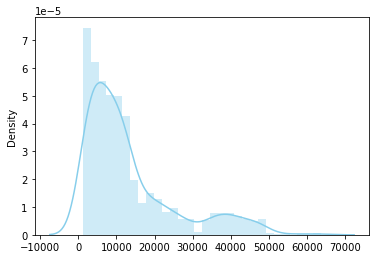

In [50]:
sns.distplot(df_insurance.select('charges').toPandas(), color="skyblue")

In [ ]:
#cheching the density of bmi

<AxesSubplot:ylabel='Density'>

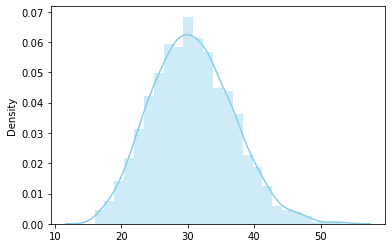

In [83]:
sns.distplot(df_insurance.select('bmi').toPandas(), color="skyblue")

<AxesSubplot:ylabel='Density'>

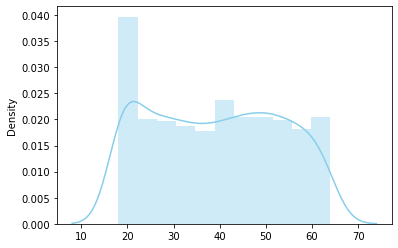

In [86]:
sns.distplot(df_insurance.select('age').toPandas(), color="skyblue")

# Conclusion
PySpark is a great language for data scientists to learn because it enables scalable analysis and ML pipelines.
If you're already familiar with Python and SQL and Pandas.